In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Load data from Excel file
excel_file = "/content/Bacteria.xlsx"
df = pd.read_excel(excel_file)

In [4]:
df

Time(hrs)  Bacterial Growth
0     0.066667              0.20
1     0.133333              0.42
2     0.200000              0.88
3     0.266667              1.18
4     0.333333              1.52
..         ...               ...
274  18.333333             93.32
275  18.400000             93.66
276  18.466667             94.00
277  18.533333             94.34
278  18.600000             94.68

[279 rows x 2 columns]

In [5]:
time_points = df["Time(hrs)"].values[:, None]
growth_rates = df["Bacterial Growth"].values[:, None]

In [6]:
print(time_points)

[[ 0.06666667]
 [ 0.13333333]
 [ 0.2       ]
 [ 0.26666667]
 [ 0.33333333]
 [ 0.4       ]
 [ 0.46666667]
 [ 0.53333333]
 [ 0.6       ]
 [ 0.66666667]
 [ 0.73333333]
 [ 0.8       ]
 [ 0.86666667]
 [ 0.93333333]
 [ 1.        ]
 [ 1.06666667]
 [ 1.13333333]
 [ 1.2       ]
 [ 1.26666667]
 [ 1.33333333]
 [ 1.4       ]
 [ 1.46666667]
 [ 1.53333333]
 [ 1.6       ]
 [ 1.66666667]
 [ 1.73333333]
 [ 1.8       ]
 [ 1.86666667]
 [ 1.93333333]
 [ 2.        ]
 [ 2.06666667]
 [ 2.13333333]
 [ 2.2       ]
 [ 2.26666667]
 [ 2.33333333]
 [ 2.4       ]
 [ 2.46666667]
 [ 2.53333333]
 [ 2.6       ]
 [ 2.66666667]
 [ 2.73333333]
 [ 2.8       ]
 [ 2.86666667]
 [ 2.93333333]
 [ 3.        ]
 [ 3.06666667]
 [ 3.13333333]
 [ 3.2       ]
 [ 3.26666667]
 [ 3.33333333]
 [ 3.4       ]
 [ 3.46666667]
 [ 3.53333333]
 [ 3.6       ]
 [ 3.66666667]
 [ 3.73333333]
 [ 3.8       ]
 [ 3.86666667]
 [ 3.93333333]
 [ 4.        ]
 [ 4.06666667]
 [ 4.13333333]
 [ 4.2       ]
 [ 4.26666667]
 [ 4.33333333]
 [ 4.4       ]
 [ 4.46666

In [9]:
print(growth_rates )

[[ 0.2 ]
 [ 0.42]
 [ 0.88]
 [ 1.18]
 [ 1.52]
 [ 1.86]
 [ 2.2 ]
 [ 2.54]
 [ 2.88]
 [ 3.22]
 [ 3.56]
 [ 3.9 ]
 [ 4.24]
 [ 4.58]
 [ 4.92]
 [ 5.26]
 [ 5.6 ]
 [ 5.94]
 [ 6.28]
 [ 6.62]
 [ 6.96]
 [ 7.3 ]
 [ 7.64]
 [ 7.98]
 [ 8.32]
 [ 8.66]
 [ 9.  ]
 [ 9.34]
 [ 9.68]
 [10.02]
 [10.36]
 [10.7 ]
 [11.04]
 [11.38]
 [11.72]
 [12.06]
 [12.4 ]
 [12.74]
 [13.08]
 [13.42]
 [13.76]
 [14.1 ]
 [14.44]
 [14.78]
 [15.12]
 [15.46]
 [15.8 ]
 [16.14]
 [16.48]
 [16.82]
 [17.16]
 [17.5 ]
 [17.84]
 [18.18]
 [18.52]
 [18.86]
 [19.2 ]
 [19.54]
 [19.88]
 [20.22]
 [20.56]
 [20.9 ]
 [21.24]
 [21.58]
 [21.92]
 [22.26]
 [22.6 ]
 [22.94]
 [23.28]
 [23.62]
 [23.96]
 [24.3 ]
 [24.64]
 [24.98]
 [25.32]
 [25.66]
 [26.  ]
 [26.34]
 [26.68]
 [27.02]
 [27.36]
 [27.7 ]
 [28.04]
 [28.38]
 [28.72]
 [29.06]
 [29.4 ]
 [29.74]
 [30.08]
 [30.42]
 [30.76]
 [31.1 ]
 [31.44]
 [31.78]
 [32.12]
 [32.46]
 [32.8 ]
 [33.14]
 [33.48]
 [33.82]
 [34.16]
 [34.5 ]
 [34.84]
 [35.18]
 [35.52]
 [35.86]
 [36.2 ]
 [36.54]
 [36.88]
 [37.22]
 [37.56]
 

In [10]:
#Define the PINN model architecture
class PINN(tf.keras.Model):
    def __init__(self):
        super(PINN, self).__init__()
        self.dense1 = tf.keras.layers.Dense(50, activation='tanh')
        self.dense2 = tf.keras.layers.Dense(50, activation='tanh')
        self.dense3 = tf.keras.layers.Dense(1)

    def call(self, t):
        x = self.dense1(t)
        x = self.dense2(x)
        return self.dense3(x)

In [11]:
# Define loss function for PINN
def loss(model, t, growth_rate):
    with tf.GradientTape() as tape:
        predicted_growth_rate = model(t)
        loss = tf.reduce_mean(tf.square(predicted_growth_rate - growth_rate))
    return loss

In [25]:
# Convert data to TensorFlow tensors
t_train = tf.constant(time_points, dtype=tf.float32)
growth_rate_train = tf.constant(growth_rates, dtype=tf.float32)

# Train the PINN model
model = PINN()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Lists to store results
losses = []
population = []
log_population = []
growth_rate = []

for i in range(1000):
    with tf.GradientTape() as tape:
        loss_value = loss(model, t_train, growth_rate_train)
    grads = tape.gradient(loss_value, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    losses.append(loss_value.numpy())
    # Calculate population, logarithm of population, and growth rate
    predicted_growth_rate = model(t_train).numpy()
    population_change = predicted_growth_rate * t_train
    population.append(np.cumsum(population_change))
    log_population.append(np.log(np.cumsum(population_change)))
    growth_rate.append(predicted_growth_rate)

# Convert lists to numpy arrays
population = np.array(population)
log_population = np.array(log_population)
growth_rate = np.array(growth_rate)

# Calculate derivatives
population_derivative = np.gradient(population, axis=0)
growth_rate_derivative = np.gradient(growth_rate, axis=0)
population_second_derivative = np.gradient(population_derivative, axis=0)


<ipython-input-25-538c5470fa7b>:26: RuntimeWarning: invalid value encountered in log
  log_population.append(np.log(np.cumsum(population_change)))


In [27]:
# Predict growth dynamics using trained PINN
predicted_growth_rate = model(t_train).numpy()

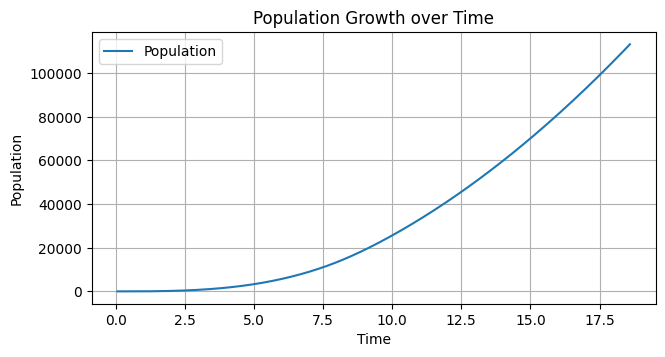

In [28]:
# Plotting
plt.figure(figsize=(16, 12))

# Population growth over time
plt.subplot(3, 2, 1)
plt.plot(time_points, population[-1], label='Population')
plt.title('Population Growth over Time')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()


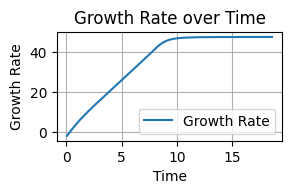

In [29]:
# Growth rate over time
plt.subplot(3, 2, 2)
plt.plot(time_points, growth_rate[-1], label='Growth Rate')
plt.title('Growth Rate over Time')
plt.xlabel('Time')
plt.ylabel('Growth Rate')
plt.legend()
plt.grid(True)
plt.show()

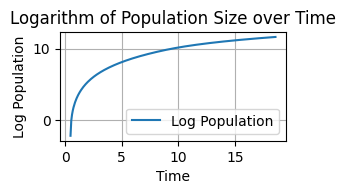

In [30]:
# Logarithm of population size over time
plt.subplot(3, 2, 3)
plt.plot(time_points, log_population[-1], label='Log Population')
plt.title('Logarithm of Population Size over Time')
plt.xlabel('Time')
plt.ylabel('Log Population')
plt.legend()
plt.grid(True)
plt.show()

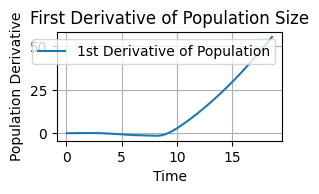

In [31]:
# First derivative of population size with respect to time
plt.subplot(3, 2, 4)
plt.plot(time_points, population_derivative[-1], label='1st Derivative of Population')
plt.title('First Derivative of Population Size')
plt.xlabel('Time')
plt.ylabel('Population Derivative')
plt.legend()
plt.grid(True)
plt.show()


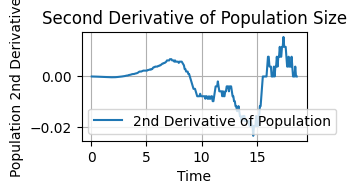

In [32]:
# Second derivative of population size with respect to time
plt.subplot(3, 2, 5)
plt.plot(time_points, population_second_derivative[-1], label='2nd Derivative of Population')
plt.title('Second Derivative of Population Size')
plt.xlabel('Time')
plt.ylabel('Population 2nd Derivative')
plt.legend()
plt.grid(True)
plt.show()

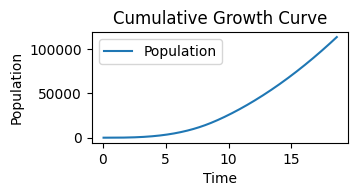

In [33]:
# Cumulative growth curve
plt.subplot(3, 2, 6)
plt.plot(time_points, population[-1], label='Population')
plt.title('Cumulative Growth Curve')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()

plt.tight_layout()
plt.show()

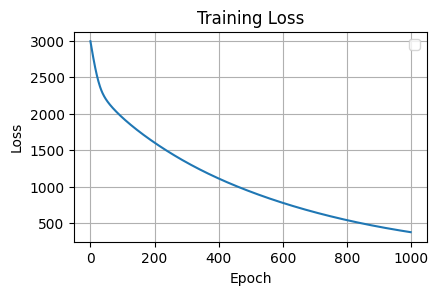

In [34]:
plt.figure(figsize=(10, 6))

# Loss Plot
plt.subplot(2, 2, 1)
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

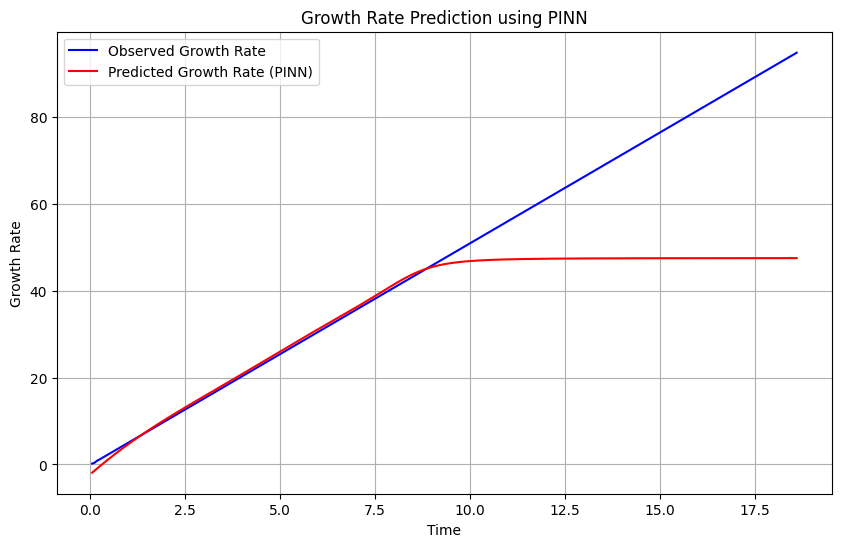

In [35]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time_points, growth_rates, label='Observed Growth Rate', color='blue')
plt.plot(time_points, predicted_growth_rate, label='Predicted Growth Rate (PINN)', color='red')
plt.title('Growth Rate Prediction using PINN')
plt.xlabel('Time')
plt.ylabel('Growth Rate')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-37-2c703e067754>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


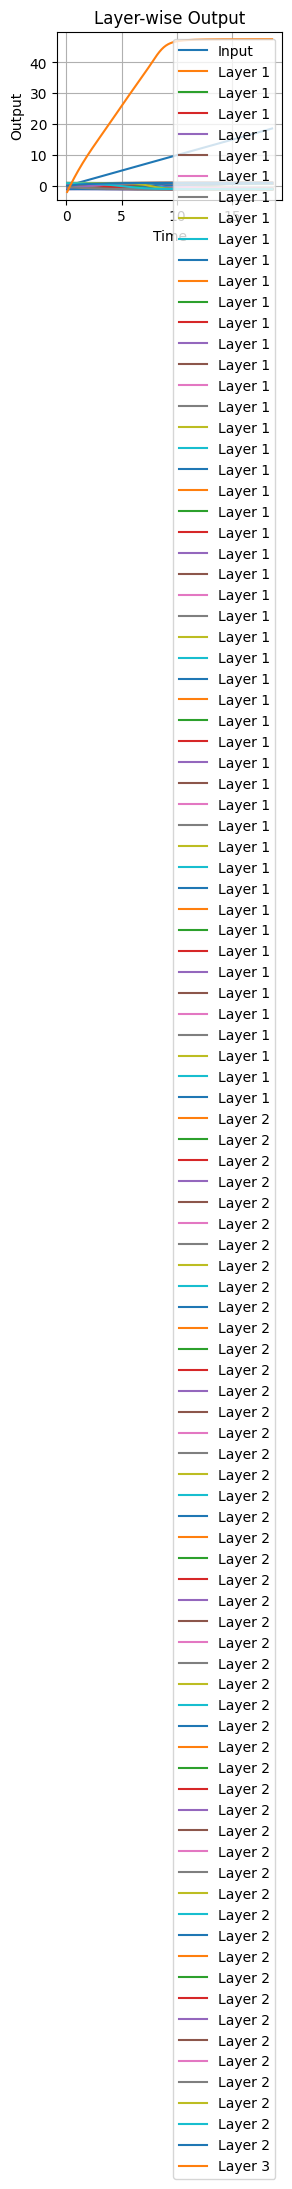

In [37]:
# Layer-wise Output Visualization
plt.subplot(2, 2, 3)
layer_outputs = [t_train]  # Input data
for layer in model.layers:
    layer_outputs.append(layer(layer_outputs[-1]))
layer_names = ['Input'] + [f'Layer {i}' for i in range(1, len(layer_outputs))]
for i, output in enumerate(layer_outputs):
    plt.plot(time_points, output, label=layer_names[i])
plt.title('Layer-wise Output')
plt.xlabel('Time')
plt.ylabel('Output')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [38]:
# Calculate accuracy (Mean Squared Error)
mse = np.mean(np.square(growth_rates - predicted_growth_rate))
print(f'PINN Accuracy (MSE): {mse:.4f}')

PINN Accuracy (MSE): 375.5908



Sure, here's a complete code example demonstrating how to train a Physics-Informed Neural Network (PINN) using data from an Excel file. In this example, we'll assume the Excel file contains time-series data of growth rates or population sizes for E. coli strains carrying reduced genomes.

python
Copy code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Load data from Excel file
excel_file = "your_dataset.xlsx"
df = pd.read_excel(excel_file)

# Assuming the Excel file has columns "Time" and "GrowthRate"
time_points = df["Time"].values[:, None]
growth_rates = df["GrowthRate"].values[:, None]

# Define the PINN model architecture
class PINN(tf.keras.Model):
    def __init__(self):
        super(PINN, self).__init__()
        self.dense1 = tf.keras.layers.Dense(50, activation='tanh')
        self.dense2 = tf.keras.layers.Dense(50, activation='tanh')
        self.dense3 = tf.keras.layers.Dense(1)

    def call(self, t):
        x = self.dense1(t)
        x = self.dense2(x)
        return self.dense3(x)

# Define loss function for PINN
def loss(model, t, growth_rate):
    with tf.GradientTape() as tape:
        predicted_growth_rate = model(t)
        loss = tf.reduce_mean(tf.square(predicted_growth_rate - growth_rate))
    return loss

# Convert data to TensorFlow tensors
t_train = tf.constant(time_points, dtype=tf.float32)
growth_rate_train = tf.constant(growth_rates, dtype=tf.float32)

# Train the PINN model
model = PINN()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

for i in range(1000):
    with tf.GradientTape() as tape:
        loss_value = loss(model, t_train, growth_rate_train)
    grads = tape.gradient(loss_value, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

# Predict growth dynamics using trained PINN
predicted_growth_rate = model(t_train).numpy()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time_points, growth_rates, label='Observed Growth Rate', color='blue')
plt.plot(time_points, predicted_growth_rate, label='Predicted Growth Rate (PINN)', color='red')
plt.title('Growth Rate Prediction using PINN')
plt.xlabel('Time')
plt.ylabel('Growth Rate')
plt.legend()
plt.grid(True)
plt.show()

# Calculate accuracy (Mean Squared Error)
mse = np.mean(np.square(growth_rates - predicted_growth_rate))
print(f'PINN Accuracy (MSE): {mse:.4f}')
In this code:

We first load the data from the Excel file using pandas read_excel function.
We assume that the Excel file has columns named "Time" and "GrowthRate", which contain the time points and corresponding growth rates, respectively.
We then define the PINN model architecture and loss function as before.
The data is converted to TensorFlow tensors using tf.constant.
The PINN model is trained using the provided data.
Finally, we visualize the observed growth rates and the predicted growth rates using Matplotlib.
We calculate the Mean Squared Error (MSE) to evaluate the accuracy of the PINN model's predictions.
Make sure to replace "your_dataset.xlsx" with the path to your actual Excel file containing the growth data. Additionally, modify the column names ("Time" and "GrowthRate") to match the column names in your Excel file.

Certainly! Let's break down each of the requested plots and their significance:

1. **Population Growth over Time**: This plot shows how the population size changes over time based on the predictions of the PINN model. It gives a direct visualization of the growth dynamics, indicating whether the population is increasing or decreasing over time.

2. **Growth Rate over Time**: This plot illustrates the predicted growth rate over time. It provides insights into the rate at which the population is growing or declining at different time points. Peaks or troughs in the growth rate curve indicate periods of rapid or slow population growth, respectively.

3. **Logarithm of Population Size over Time**: Taking the logarithm of the population size over time helps to linearize the growth process. It can reveal underlying trends more clearly, especially when the population grows exponentially. A straight line in this plot suggests exponential growth or decay.

4. **First Derivative of Population Size with respect to Time**: This plot represents the rate of change of population growth, i.e., the slope of the population growth curve. It indicates whether the population growth is accelerating or decelerating over time. Peaks or troughs in this curve suggest changes in the growth rate.

5. **Second Derivative of Population Size with respect to Time**: The second derivative provides information about the rate of change of the growth rate, indicating acceleration or deceleration in population growth. Peaks or troughs in this curve suggest changes in the rate of change of population growth, which can be interpreted as inflection points in the growth dynamics.

6. **Cumulative Growth Curve**: This plot shows the total population size accumulated over time. It is obtained by integrating the growth rate over time. It provides a cumulative view of population growth, indicating the total size of the population at any given time point.

These plots collectively offer a comprehensive understanding of the population growth dynamics predicted by the PINN model, including the growth rate, acceleration or deceleration in growth, cumulative growth, and their derivatives over time.